In [35]:
import pandas
%matplotlib inline
import matplotlib.pyplot

In [6]:
chicago = pandas.read_csv('/mnt/GA/dat11syd/data/chicagohouseprices2.csv', index_col=0).dropna()
chicago

,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4.0,2.09,9,3.84,94,3049,3492,36.2,629300.0
4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2.0,4.63,9,2.96,31,2614,1840,78.9,463644.0
5,"1634 W Wabansia Ave, Chicago IL",Wicker Park,Single-Family Home,695000,2.0,1.40,8,2.86,23,2614,1628,50.0,813150.0
8,"1418 N Bell Ave, Chicago IL",Wicker Park,Multi-Family Home,466000,2.0,4.93,10,4.02,121,3049,1344,16.7,538696.0
9,"1308 N Bosworth Ave, Chicago IL",Wicker Park,Multi-Family Home,435000,2.0,4.75,8,2.89,119,3485,1760,40.0,463275.0
10,"1025 N Wood St, Chicago IL",Wicker Park,Multi-Family Home,303000,2.0,4.68,8,3.43,119,3049,2728,59.5,361782.0
11,"1732 W Pierce Ave, Chicago IL",Wicker Park,Multi-Family Home,314000,3.0,5.18,9,3.06,131,2614,2405,50.0,334724.0
13,"2116 W Potomac Ave, Chicago IL",Wicker Park,Multi-Family Home,650000,3.0,3.89,10,3.86,119,3485,3618,16.7,680550.0
14,"1421 N Wood St, Chicago IL",Wicker Park,Single-Family Home,490500,1.0,5.38,9,3.21,124,2614,922,69.4,516987.0
16,"1411 N Ashland Ave, Chicago IL",Wicker Park,Multi-Family Home,590000,2.0,4.50,8,2.90,118,2614,2544,78.9,589410.0


In [8]:
import sklearn.linear_model

In [10]:
chicago.dtypes

Address            object
Neighborhood       object
HouseType          object
Price               int64
Bath              float64
CrimeIndex        float64
MinutesToLoop       int64
MilesToLake       float64
Age                 int64
LotSizeSqft         int64
HouseSizeSqft       int64
SchoolIndex       float64
EstimatedPrice    float64
dtype: object

In [41]:
X_columns = ['EstimatedPrice', 'Bath', 'CrimeIndex', 'MinutesToLoop', 'MilesToLake', 'Age', 'LotSizeSqft', 'HouseSizeSqft', 'SchoolIndex']

In [42]:
Y = chicago.Price

In [115]:
sklearn.model_selection.train_test_split?

In [116]:
import sklearn.model_selection
import sklearn.metrics
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(chicago[X_columns],Y, test_size=5
                                                                             )

In [117]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, lr.predict(Xtest))

0.9324649824836214

In [118]:
sklearn.metrics.median_absolute_error(Ytest, lr.predict(Xtest))

33388.15850613045

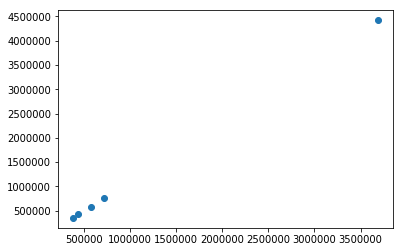

In [119]:
matplotlib.pyplot.scatter(Ytest, lr.predict(Xtest))

In [120]:
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, elastic.predict(Xtest))

0.9587675188633095

In [121]:
sklearn.metrics.median_absolute_error(Ytest, elastic.predict(Xtest))

18958.115069078747

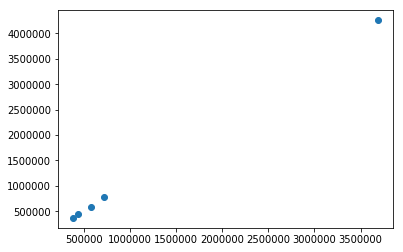

In [122]:
matplotlib.pyplot.scatter(Ytest, elastic.predict(Xtest))

In [123]:
sklearn.metrics.r2_score?

In [124]:
import sklearn.dummy
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, dummy.predict(Xtest))

-0.13249682166861598

In [125]:
sklearn.metrics.median_absolute_error(Ytest, dummy.predict(Xtest))

266382.8125

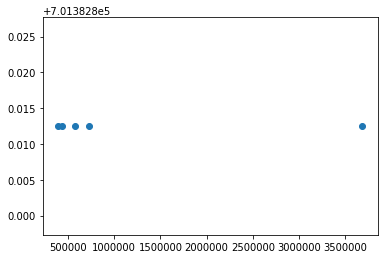

In [126]:
matplotlib.pyplot.scatter(Ytest, dummy.predict(Xtest))

In [127]:
import sklearn.tree
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, tree.predict(Xtest))

0.9994878485856062

In [128]:
sklearn.metrics.median_absolute_error(Ytest, tree.predict(Xtest))

6500.0

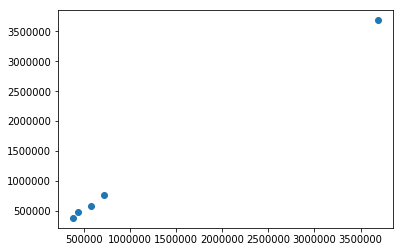

In [129]:
matplotlib.pyplot.scatter(Ytest, tree.predict(Xtest))

In [130]:
import sklearn.ensemble

In [131]:
bag = sklearn.ensemble.BaggingRegressor(sklearn.tree.DecisionTreeRegressor(),
                                  n_estimators=32,
                                  max_features=6,
                                  max_samples=0.25,
                                  n_jobs=-1
                                 )

In [132]:
bag.fit(Xtrain, Ytrain)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=6,
         max_samples=0.25, n_estimators=32, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [133]:
sklearn.metrics.r2_score(Ytest, bag.predict(Xtest))

0.30653599984505275

In [134]:
sklearn.metrics.median_absolute_error(Ytest, bag.predict(Xtest))

112328.125

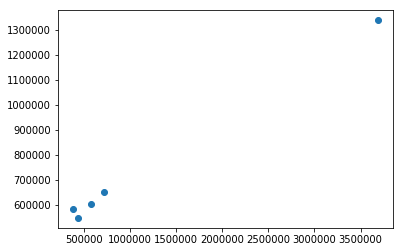

In [135]:
matplotlib.pyplot.scatter(Ytest, bag.predict(Xtest))

In [136]:
import sys
sklearn.tree.export_graphviz(bag.estimators_[0], out_file=sys.stdout)

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 819582.0\nmse = 77922246093.75\nsamples = 16\nvalue = 591812.5"] ;
1 [label="X[1] <= 458420.75\nmse = 22875559171.598\nsamples = 13\nvalue = 480692.308"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[5] <= 2831.5\nmse = 5008916666.667\nsamples = 6\nvalue = 332000.0"] ;
1 -> 2 ;
3 [label="X[4] <= 1332.0\nmse = 663062500.0\nsamples = 2\nvalue = 241750.0"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 1\nvalue = 267500.0"] ;
3 -> 4 ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 216000.0"] ;
3 -> 5 ;
6 [label="X[2] <= 19.45\nmse = 1073046875.0\nsamples = 4\nvalue = 377125.0"] ;
2 -> 6 ;
7 [label="mse = 0.0\nsamples = 1\nvalue = 322000.0"] ;
6 -> 7 ;
8 [label="X[4] <= 2389.5\nmse = 80166666.667\nsamples = 3\nvalue = 395500.0"] ;
6 -> 8 ;
9 [label="X[2] <= 29.2\nmse = 12250000.0\nsamples = 2\nvalue = 401500.0"] ;
8 -> 9 ;
10 [label="mse = 0.0\nsamples = 1\nvalue = 398000.0"] ;
9 -> 10 ;
11 [label="mse = 0.0\nsamples =

In [137]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ts.predict(Xtest))

0.9967725799804408

In [138]:
sklearn.metrics.median_absolute_error(Ytest, ts.predict(Xtest))

20032.31143175636

In [139]:
import numpy
class MegaEnsemble:
    def __init__(self, models):
        self.models = models
    def predict(self,X):
        final_answer = []
        for i in X.index:
            x = X.loc[i]
            answers = [m.predict(x) for m in self.models].append(numpy.mean(answers)
        print(answers)
        for i in range(answers):
            final_answer.append(answers[i].mean)
        return final_answer

SyntaxError: invalid syntax (<ipython-input-139-0376b4ceb073>, line 10)

In [140]:
m = MegaEnsemble([lr, ts, tree, bag, elastic])
m.predict(Xtest)

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [141]:
rfr = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
rfr.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, rfr.predict(Xtest))

0.9004945536426489

In [142]:
sklearn.metrics.median_absolute_error(Ytest, rfr.predict(Xtest))

42590.0

In [143]:
Xtrain.shape

(64, 9)

In [144]:
Xtest.shape

(5, 9)

In [146]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ransac.predict(Xtest))

0.9965310500102249

In [147]:
sklearn.metrics.median_absolute_error(Ytest, ransac.predict(Xtest))

35809.16883288033

In [148]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, huber.predict(Xtest))

/usr/lib/python3/dist-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.9844359107796341

In [149]:
sklearn.metrics.median_absolute_error(Ytest, huber.predict(Xtest))

17799.982074184576